# Section 04 
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021

# Ridge Regression and LASSO Regression 

# Problem 1
Below we load the [Boston house prices dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset). We store the labels of predictors for you and split the dataset into a training and test set using 1/3 as the test size and a random state of 553.

In [2]:
from sklearn.datasets import load_boston
boston_bunch = load_boston()
X = boston_bunch.data
y = boston_bunch.target
labels = boston_bunch.feature_names

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=553)

## 1.1
In the homework1, we built three different linear models by OLS to predict house price (MEDV) and calculated their $R^{2}$'s. The models of using all the 13 predictor variables and using the polynomial combinations of the 13 predictor variables both have high $R^{2}$'s. But is it optimal to use all the predictor variables? Compute the variance, bias and the Mean Squared Error (MSE) of three models we built in the homework1. What can be observed?

(Import the function bias_variance_decomp() from mlxtend.evaluate to calculate the variance, bias and the MSE.
You may see more details here: http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/#api. 
And the source code of the function is here:https://github.com/rasbt/mlxtend/blob/master/mlxtend/evaluate/bias_variance_decomp.py )

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

# MODEL 1: using all predictor variables
reg1 = LinearRegression().fit(X_train, y_train)

# MODEL 2: using only AGE, NOX, DIS, and RAD as predictor variables
ind2 = np.where([a in ['AGE','NOX','DIS','RAD'] for a in boston_bunch.feature_names])[0]
reg2 = LinearRegression().fit(X_train[:,ind2], y_train)

# MODEL 3: using all polynomial combinations of degree  ≤2  of the original thirteen predictor variables
import sklearn.preprocessing as prepro
poly = prepro.PolynomialFeatures(2)
X_train_enhanced = poly.fit_transform(X_train)
X_test_enhanced = poly.fit_transform(X_test)
reg3 = LinearRegression().fit(X_train_enhanced, y_train)

In [13]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 3.1 MB/s eta 0:00:01


In [11]:
from sklearn import metrics
# http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/ 
from mlxtend.evaluate import bias_variance_decomp

mse1, bias1, var1 = bias_variance_decomp(reg1, X_train, y_train, X_test, y_test, loss='mse', random_seed=111)
mse2, bias2, var2 = bias_variance_decomp(reg2, X_train[:,ind2], y_train, X_test[:,ind2], y_test, loss='mse', random_seed=111)
mse3, bias3, var3 = bias_variance_decomp(reg3, X_train_enhanced, y_train, X_test_enhanced, y_test, loss='mse', random_seed=111)

print("** MODEL 1: using all predictor variables **")
print(f"variance : {var1}\nBias: {bias1}\nMean Squared Error: {mse1}\n")

print("** MODEL 2: using only AGE, NOX, DIS, and RAD as predictor variables **")
print(f"variance : {var2}\nBias: {bias2}\nMean Squared Error: {mse2}\n")

print("** MODEL 3: using all polynomial combinations of degree  ≤2  of the original thirteen predictor variables **")
print(f"variance : {var3}\nBias: {bias3}\nMean Squared Error: {mse3}")

** MODEL 1: using all predictor variables **
variance : 1.2751368194990393
Bias: 29.147957295478538
Mean Squared Error: 30.423094114977562

** MODEL 2: using only AGE, NOX, DIS, and RAD as predictor variables **
variance : 0.869550426967466
Bias: 75.06383452035581
Mean Squared Error: 75.9333849473233

** MODEL 3: using all polynomial combinations of degree  ≤2  of the original thirteen predictor variables **
variance : 180.54550982191267
Bias: 17.078413087556502
Mean Squared Error: 197.62392290946917


## 1.2
In fact, as we add more and more parameters to our model, its complexity increases, which results in increasing variance and decreasing bias, i.e., overfitting. See the picture: <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/05153332/model-complex.png" alt="image info" /> So we need to balance the variance and the bias. In practice, we usually use regularization to overcome overfitting.

Implement Ridge Regression and LASSO Regression on the enhanced dataset. Compute the $R^{2}$, variance, bias and MSE. Which one performs better?.(use alpha = 0.1)

In [16]:
from sklearn.linear_model import Ridge

# must do normalization to data! WHY: to ensure that the regularisation term λ 
# regularises/affects the variable involved in a (somewhat) similar manner

# alpha: regularization strength (positive float); Ridge func has normalization option 
ridge_reg = Ridge(alpha=0.1, normalize=True)
ridge_reg.fit(X_train_enhanced,y_train)
# pred1 = ridgeReg.predict(X_test_enhanced)

ridge_r2 = ridge_reg.score(X_test_enhanced, y_test)
# R-square of Ridge
print('R-square of Ridge Regression model')
print(f"{ridge_r2}")

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, normalize=True)
lasso_reg.fit(X_train_enhanced, y_train)

lasso_r2 = lasso_reg.score(X_test_enhanced, y_test)
# R-square of LASSO
print('\nR-square of LASSO Regression model')
print(f"{lasso_r2}")

# var, bias, mse
mse1, bias1, var1 = bias_variance_decomp(ridge_reg, X_train_enhanced, y_train, X_test_enhanced, y_test, loss='mse', random_seed=111)
mse2, bias2, var2 = bias_variance_decomp(lasso_reg, X_train_enhanced, y_train, X_test_enhanced, y_test, loss='mse', random_seed=111)
print('\n** Ridge Regression model **')
print(f"MSE: {mse1}")
print(f"Bias: {bias1}")
print(f"Variance: {var1}")

print('\n** LASSO Regression model **')
print(f"MSE: {mse2}")
print(f"Bias: {bias2}")
print(f"Variance: {var2}")

R-square of Ridge Regression model
0.7768178773906133

R-square of LASSO Regression model
0.6111109976799425

** Ridge Regression model **
MSE: 22.240032289775982
Bias: 20.860233855934272
Variance: 1.3797984338416993

** LASSO Regression model **
MSE: 36.85360016072828
Bias: 36.266293295813384
Variance: 0.5873068649148921


Since the $R^{2}$ of Ridge regression model is larger than that of LASSO regression model and the MSE of Ridge regression is smaller, then Ridge regression performs better. And we see that the MSE of Ridge regression is better than that of the three models we built in previous part.

## 1.3
Now implement Ridge Regression and LASSO Regression on the original dataset. Change the values of the hyperparameters of Ridge and LASSO, how does the magnitude of the coefficients change? Is there any difference between these two methods? If we have a large dataset with 10,000 features, and some of the independent features are correlated with other independent features, which regression would you use, Ridge or LASSO?

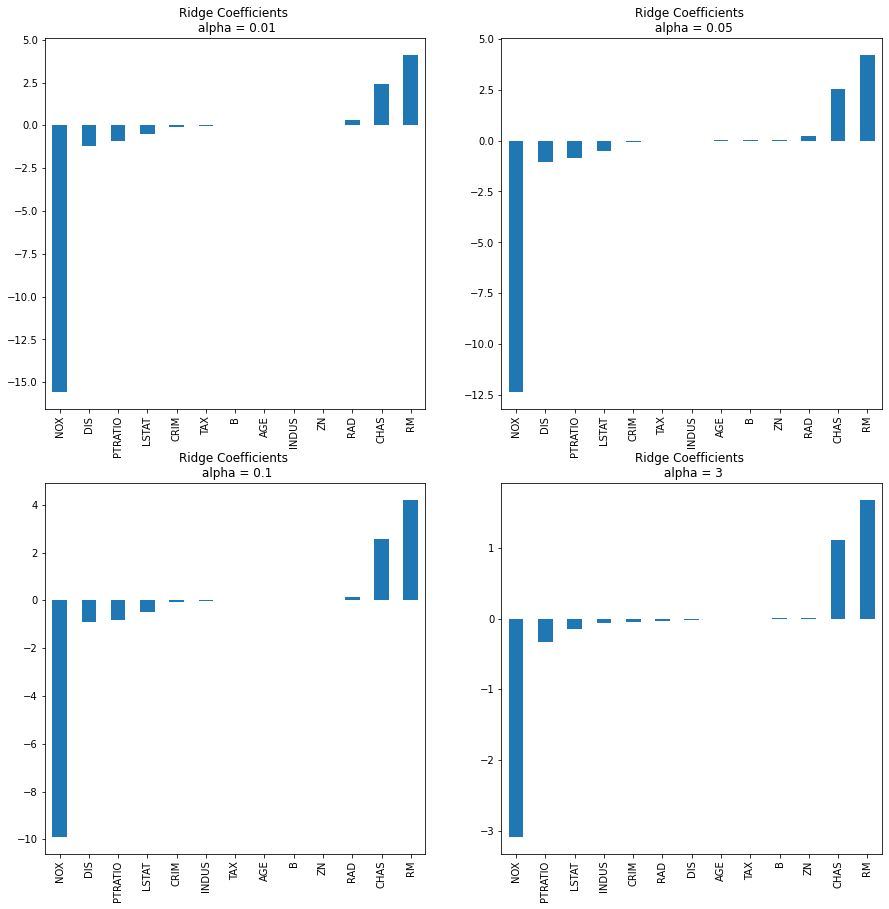

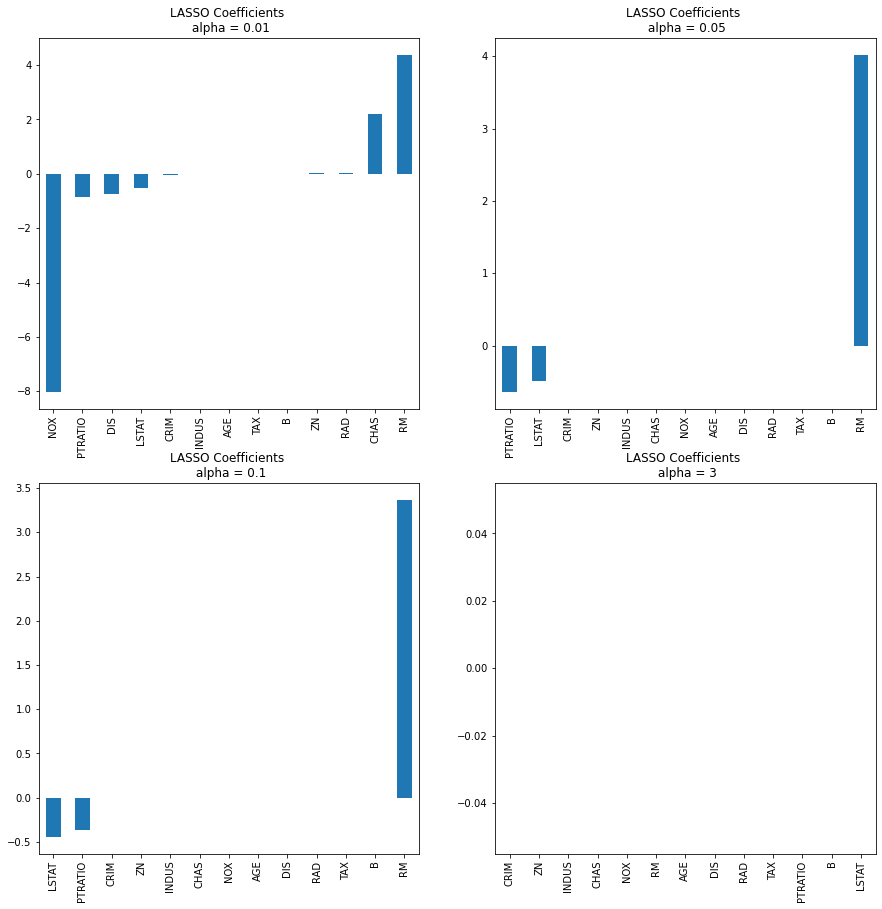

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes = axes.ravel()

coef_list1 = []
alpha_val = [0.01,0.05,0.1,3]

for alpha in alpha_val:
    ridge_reg = Ridge(alpha=alpha, normalize=True)
    ridge_reg.fit(X_train,y_train)
    coef_list1.append(pd.Series(ridge_reg.coef_,labels).sort_values())
    
# different alpha in Ridge regression
for j in range(0,4):
    coef_list1[j].plot(ax = axes[j] ,kind='bar', title=f"Ridge Coefficients \n alpha = {alpha_val[j]}") 
    
# coefficient plot of LASSO model, different alpha
figure,axes = plt.subplots(2,2,figsize=(15,15))

axes = axes.ravel()

coef_list2 = []

alpha_val = [0.01,0.05,0.1,3]
for alpha in alpha_val:
    lasso_reg = Lasso(alpha=alpha, normalize=True)
    lasso_reg.fit(X_train,y_train)
    coef_list2.append(pd.Series(lasso_reg.coef_,labels).sort_values())
# different alpha in LASSO regression
for j in range(0,4):
    coef_list2[j].plot(ax = axes[j] ,kind='bar', title=f"LASSO Coefficients \n alpha = {alpha_val[j]}") 

plt.show()

# 2. Principal Component Analysis

## Problem 2


## 2.1
For the Boston house prices dataset, split the dataset into a training and test set using 2/5 as the test size and a random state of 553, and use polynomial features of degree 3, then run standard LinearRegression. Can you interpret the resulting test and training error in the context of the bias-variance tradeoff? 

## 2.2
Apply PCA with a number of 5, 50, 100 and 200 principal component, and run LinearRegression subsequently on the resulting principal components. What can be observed?